###Implement LSA and Topic model.

# Preprocess

###Loading sarcasm dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/NLP 7th sem/dataset/Sarcasm_Headlines_Dataset_v2.json', lines = True)
print(df.shape)

df.head()

(28619, 3)


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [3]:
df = df[0:5000]

In [4]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

df['headline'].map(preprocess)

0       thirtysomething scientist unveil doomsday cloc...
1       dem rep totally nail congress fall short gende...
2               eat veggie 9 deliciously different recipe
3                 inclement weather prevent liar get work
4          mother come pretty close word stream correctly
                              ...                        
4995              man stick man land domino delivery area
4996    father show kid field dream time unaware kevin...
4997    man sure girlfriend have hang cluster picture ...
4998    new york times defend cover hack democratic em...
4999    riverdale star lili reinhart apologize insensi...
Name: headline, Length: 5000, dtype: object

In [5]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


#LSA

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
vectorized_corpus = vectorizer.fit_transform(df['headline'].tolist())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

In [ ]:
vectorized_corpus.shape

#Topic Model


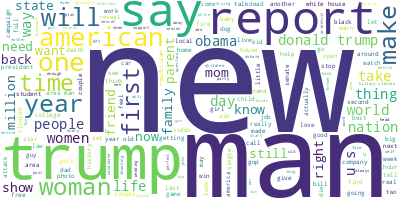

In [6]:
from wordcloud import WordCloud

long_string = ','.join(list(df['headline'].values))

wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

#LDA analysis

In [7]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = df.headline.values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['thirtysomething', 'scientists', 'unveil', 'doomsday', 'clock', 'hair', 'loss']


In [8]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [9]:
from pprint import pprint

num_topics = 10

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.010*"new" + 0.008*"trump" + 0.005*"donald" + 0.004*"world" + '
  '0.004*"woman" + 0.004*"family" + 0.004*"americans" + 0.003*"like" + '
  '0.003*"pick" + 0.002*"years"'),
 (1,
  '0.008*"man" + 0.007*"new" + 0.006*"day" + 0.006*"one" + 0.006*"trump" + '
  '0.004*"women" + 0.004*"like" + 0.004*"open" + 0.003*"clinton" + '
  '0.003*"year"'),
 (2,
  '0.007*"trump" + 0.006*"best" + 0.003*"time" + 0.003*"says" + 0.003*"back" + '
  '0.003*"still" + 0.003*"family" + 0.003*"people" + 0.003*"state" + '
  '0.003*"thousands"'),
 (3,
  '0.011*"trump" + 0.008*"new" + 0.008*"man" + 0.004*"year" + 0.003*"says" + '
  '0.003*"people" + 0.003*"donald" + 0.003*"us" + 0.003*"obama" + 0.003*"old"'),
 (4,
  '0.005*"new" + 0.004*"trump" + 0.003*"women" + 0.003*"future" + '
  '0.003*"woman" + 0.003*"history" + 0.003*"report" + 0.003*"wants" + '
  '0.002*"come" + 0.002*"say"'),
 (5,
  '0.007*"new" + 0.006*"man" + 0.005*"trump" + 0.004*"says" + 0.003*"get" + '
  '0.003*"obama" + 0.003*"one" + 0.003*"ch

In [10]:
!pip install pyLDAvis

In [11]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import os
import pyLDAvis.gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


pyLDAvis.enable_notebook()

In [12]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.147377  0.113608       1        1  11.864982
0      0.042354  0.177879       2        1  10.682527
3     -0.142450 -0.120694       3        1  10.502360
8     -0.107653  0.165257       4        1  10.337059
7      0.019331 -0.198550       5        1  10.286223
6     -0.065549  0.063335       6        1  10.163082
9     -0.009515 -0.085802       7        1   9.740096
4     -0.202676  0.002582       8        1   8.990673
5      0.145196 -0.117738       9        1   8.897286
2      0.173585  0.000123      10        1   8.535713, topic_info=        Term        Freq       Total Category  logprob  loglift
118      man  214.000000  214.000000  Default  30.0000  30.0000
253     best   40.000000   40.000000  Default  29.0000  29.0000
204      day   78.000000   78.000000  Default  28.0000  28.0000
367   donald   65.000000   65.000000  Default  27.0000  27.0000
1752    open   21.000000   21.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
409    going    5.999143   40.623808  Topic10  -6.2368   0.5482
551    women    6.272255   70.585826  Topic10  -6.1923   0.0402
657   little    5.671445   30.382173  Topic10  -6.2930   0.7825
228    obama    5.901946   59.368572  Topic10  -6.2532   0.1524
96       new    6.179236  231.737897  Topic10  -6.2072  -1.1635

[799 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
9999       1  0.662412   abandoned
5629       8  0.756105      abrams
4493       1  0.735601  absolutely
10186     10  0.682683    absorbed
8534       2  0.844694  acceptable
...      ...       ...         ...
189        9  0.072878       years
189       10  0.072878       years
9957       5  0.678173      yemeni
10787      3  0.698457        zach
9858       8  0.791334      zombie

[2095 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 9, 8, 7, 10, 5, 6, 3])